Import essential librairies 

In [ ]:
# encoding: utf-8

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable

X & Y vectors of data

In [4]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

Display array 

In [5]:
print(x_train)

[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 3.1  ]]


x_train : from array to Tensor

In [6]:
x_train = torch.from_numpy(x_train)

y_train = torch.from_numpy(y_train)
print(x_train)

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])


# Linear Regression Model 
<span style="font-family:Times New Roman; font-size:18px;">A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0). </span>

In [7]:
class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


model = linearRegression()

<h4   style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:150%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Loss and Optimizer </h4>
<span style="font-family:Times New Roman; font-size:18px;"> Train a model means making it better and better over the course of a period of training.</span>           

In [8]:
#  loss 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

# hyperparameters

In [9]:
#  
num_epochs = 1000

<h1  id="7" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:150%;
           font-family:Times New Roman;
           letter-spacing:0.5px">  7 Training and Evaluation </h1>
writing a training loop. First we'll define epochs, the number of passes to make over the dataset. Then for each pass, we'll iterate through train_data, grabbing batches of examples and their corresponding labels.

For each batch, we'll go through the following ritual:

Generate predictions (yhat) and the loss (loss) by executing a forward pass through the network.           

In [10]:
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

model.eval()

Epoch[20/1000], loss: 30.876152
Epoch[40/1000], loss: 21.871834
Epoch[60/1000], loss: 15.508078
Epoch[80/1000], loss: 11.010529
Epoch[100/1000], loss: 7.831909
Epoch[120/1000], loss: 5.585435
Epoch[140/1000], loss: 3.997752
Epoch[160/1000], loss: 2.875664
Epoch[180/1000], loss: 2.082633
Epoch[200/1000], loss: 1.522162
Epoch[220/1000], loss: 1.126051
Epoch[240/1000], loss: 0.846102
Epoch[260/1000], loss: 0.648248
Epoch[280/1000], loss: 0.508415
Epoch[300/1000], loss: 0.409588
Epoch[320/1000], loss: 0.339742
Epoch[340/1000], loss: 0.290378
Epoch[360/1000], loss: 0.255489
Epoch[380/1000], loss: 0.230831
Epoch[400/1000], loss: 0.213403
Epoch[420/1000], loss: 0.201086
Epoch[440/1000], loss: 0.192380
Epoch[460/1000], loss: 0.186226
Epoch[480/1000], loss: 0.181876
Epoch[500/1000], loss: 0.178801
Epoch[520/1000], loss: 0.176627
Epoch[540/1000], loss: 0.175090
Epoch[560/1000], loss: 0.174002
Epoch[580/1000], loss: 0.173233
Epoch[600/1000], loss: 0.172689
Epoch[620/1000], loss: 0.172304
Epoch[64

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Prediction 

In [13]:
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()
print(predict)

[[1.5336475]
 [1.8409244]
 [2.148201 ]
 [2.4862056]
 [2.5476608]
 [1.776117 ]
 [3.3435078]
 [2.3387127]
 [2.732027 ]
 [1.2171526]
 [2.578947 ]
 [3.626202 ]
 [2.095964 ]
 [2.8457193]
 [1.4777792]]


<h1  id="8" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:250%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Plotting the Result </h1>

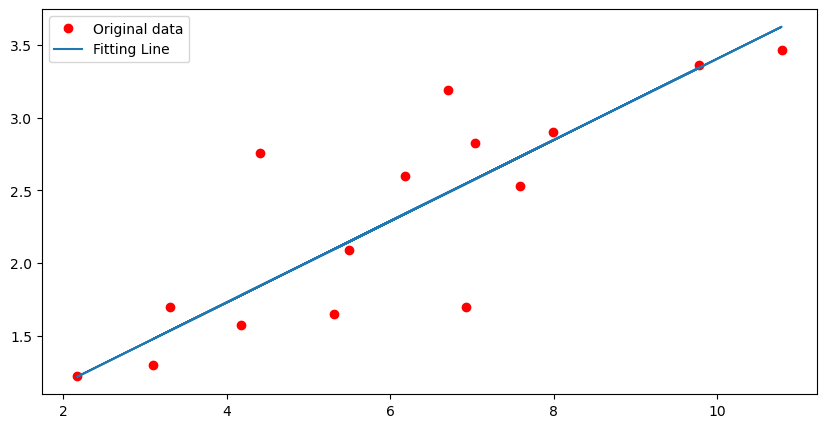

In [12]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
#  
plt.legend() 
plt.show()

#  
torch.save(model.state_dict(), './linear.pth')